# Regression

## Plan

### Vorgehensweise:

Use Case definieren durch Business Model Canvas </br>
Problemidentifikation </br>
Variablenidentifikation </br>
Erfolgsmetriken identifizieren (und Misserfolg) </br>


### Use Case

Das Unternehmen, welches bisher vor allem als Marktplatz für Immobilien von Kunden agiert hat, möchte in den Immobilienhandel einstiegen. Den Kunden sollen Angebote für Immobilien gemacht werden, wenn diese ihre Immobilie auf dem Handelsplatz registrieren. Somit kann das Unternehmen als erstes eine potenziell gewinnbringende Immobilie entdecken und erwerben. Der Kunde spart sich Zeit und Aufwand beim Verkauf der Immobilie. Um die Immobilien marktkorrekt einschätzen zu können sollen gesammelte Daten zu vergleichbaren Immobilien und deren Standorten verwendet werden, um besonders rentable Immobilien zu identifizieren. 

### Problematik

Anhand von Hausdaten wie Raumanzahl, Quadratmeter, ... sowie Daten über die Umgebung (Standort) der Immobilie wie die Menge an Schulen in unmittelbarer Umgebung oder die durchschnittliche Lärmbelästigung sollen Preise vorhergesagt werden. Somit kann das Unternehmen überteuerte oder günstige Immobilien finden und den Besitzern bessere Angebote machen. Dies soll die Erfolgschance von Angeboten erhöhen wodurch das Unternehmen günstiger rentable Immobilien erwerben kann und den Kunden Zeit und Aufwand bei der Interessentensuche und der Kaufabwicklung erspart wird.

### Variablen

Es werden strukturierte Immobiliendaten verwendet. Für den Use Case soll außerdem verglichen werden, wie viele verschiedene Variablen tatsächlich benötigt werden, um zuverlässig den Preis einer Immobilie vorherzusagen, weshalb versucht wird, zuerst ein Modell zu erstellen, welches nur mit den relevantesten Faktoren den tatsächlichen Wert der Immobilie ermittelt. Daher ist die Zielvariable der Preis der Immobilie und die erklärende Variablen sind Informationen zur Immobilie (Grundstücksgröße, Anzahl an Schlafzimmer) sowie Informationen zum Standort der Immobilie.

### Metriken

Als Erfolg wird verbucht, wenn es durch das Modell möglich ist, schnell und ohne menschliches Eingreifen Immobilienpreise zuverlässig vorherzusagen.
Die Schlüsselergebnisse für den Erfolg ist eine Modellgenauigkeit (hier die erklärbare Streuung der Zielvariable durch das Modell) von mindestens 66%, wodurch Zeit der Mitarbeiter und Experten eingespart wird. Eine höhere Genauigkeit kann zukünftig dann mit präziseren Daten erreicht werden und somit menschliches Eingreifen obsolet machen.
Bei schlechterer Genauigkeit gilt das Modell als zu ungenau und damit nicht einsetzbar. Daraufhin müsste analysiert werden, welche Daten zusätzlich benötigt werden, wie diese zu präzisieren sind oder welches Modell eventuell besser funktionieren könnte.

## Data

### Vorgehensweise:

Datenimport mit allen nötigen libraries</br>
Datensatz kopieren und anpassen </br>
data splitting </br>
Datenexploration anhand des Trainingsdatensatz (Nicht testdaten verwenden!)</br>
Korrelation zu Zielvariable per Heatmap analysieren</br>
Datenbereinigung (Duplikate und fehlende Werte)</br>
Datenverteilung aufzeigen</br>
stark korrelierende Variablen/Features auswählen</br>
Später: RobustScaling!</br>

### Datenimport

Importieren aller libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Daten einfügen und Spaltennamen vergeben

In [42]:
# Datensatz hat keine Zeilenbeschreibung! 
names = ['CRIM', 'ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv('housing.csv', header=None, delimiter='\s+', names=names)
data = pd.read_csv('housing.csv', header=None, delimiter='\s+', names=names)

Da verglichen werden soll, wie viel genauer unsere Preisvorhersage mit vielen Variablen ist, wird ein weiteres DataFrame benötigt.

In [43]:
X = data.drop(columns='PRICE') # Zielvariable!
Y = data.PRICE

Data Splitting für Datenexploration

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

In [45]:
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

In [46]:
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.909295,11.246287,11.546040,0.066832,0.558671,6.239109,69.218069,3.761290,9.935644,417.232673,18.550990,353.553960,13.062277,21.841832
std,9.096070,23.750865,6.963179,0.250040,0.117771,0.672026,27.955163,2.131902,8.928212,172.215502,2.142011,95.483144,7.062024,8.783611
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,0.083437,0.000000,5.320000,0.000000,0.449000,5.874750,45.675000,2.044600,4.000000,280.750000,17.400000,374.335000,7.525000,16.375000
50%,0.284585,0.000000,9.900000,0.000000,0.538000,6.163500,77.500000,3.132200,5.000000,345.000000,19.100000,391.305000,11.845000,20.600000
75%,4.253990,12.500000,18.100000,0.000000,0.631000,6.569000,94.600000,5.035675,24.000000,666.000000,20.200000,396.232500,17.272500,24.625000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Datenexploration und Erkenntnisgewinn

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 50 to 265
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  PRICE    404 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 63.5 KB


Alle Variablen sind vom Datentyp Float oder int und damit numerisch, somit keine Anpassung am Datentyp notwendig.

In [48]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
50,0.08873,21.0,5.64,0,0.439,5.963,45.7,6.8147,4,243.0,16.8,395.56,13.45,19.7
367,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666.0,20.2,131.42,13.33,23.1
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34,13.5
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398.0,18.7,386.40,12.34,21.2
172,0.13914,0.0,4.05,0,0.510,5.572,88.5,2.5961,5,296.0,16.6,396.90,14.69,23.1


Erklärung aller Variablen: </br>
CRIM - Pro-Kopf-Verbrechensrate nach Stadt</br>
ZN - Anteil der Wohnbauflächen, die für Grundstücke über 25.000 m² ausgewiesen sind.</br>
INDUS - Anteil der Flächen für Nicht-Einzelhandelsunternehmen pro Stadt.</br>
CHAS - Charles River Dummy-Variable (1, wenn das Gebiet an den Fluss grenzt; sonst 0)</br>
NOX - Konzentration von Stickstoffoxiden (Teile pro 10 Millionen)</br>
RM - durchschnittliche Anzahl der Zimmer pro Wohnung</br>
AGE - Anteil der Eigentumswohnungen, die vor 1940 gebaut wurden</br>
DIS - gewichtete Entfernungen zu fünf Beschäftigungszentren/Arbeitsämter</br>
RAD - Index der Erreichbarkeit von Radialautobahnen</br>
TAX - Vollwertiger Grundsteuersatz pro 10.000 \$</br>
PTRATIO - Schüler-Lehrer-Verhältnis nach Stadt</br>
B - 1000(Bk - 0,63)^2, wobei Bk der Anteil der Schwarzen in der Stadt ist </br>
LSTAT - % niedrigerer Status der Bevölkerung</br>
PRICE - Medianwert der Eigenheime in 1000 \$</br>

<AxesSubplot:>

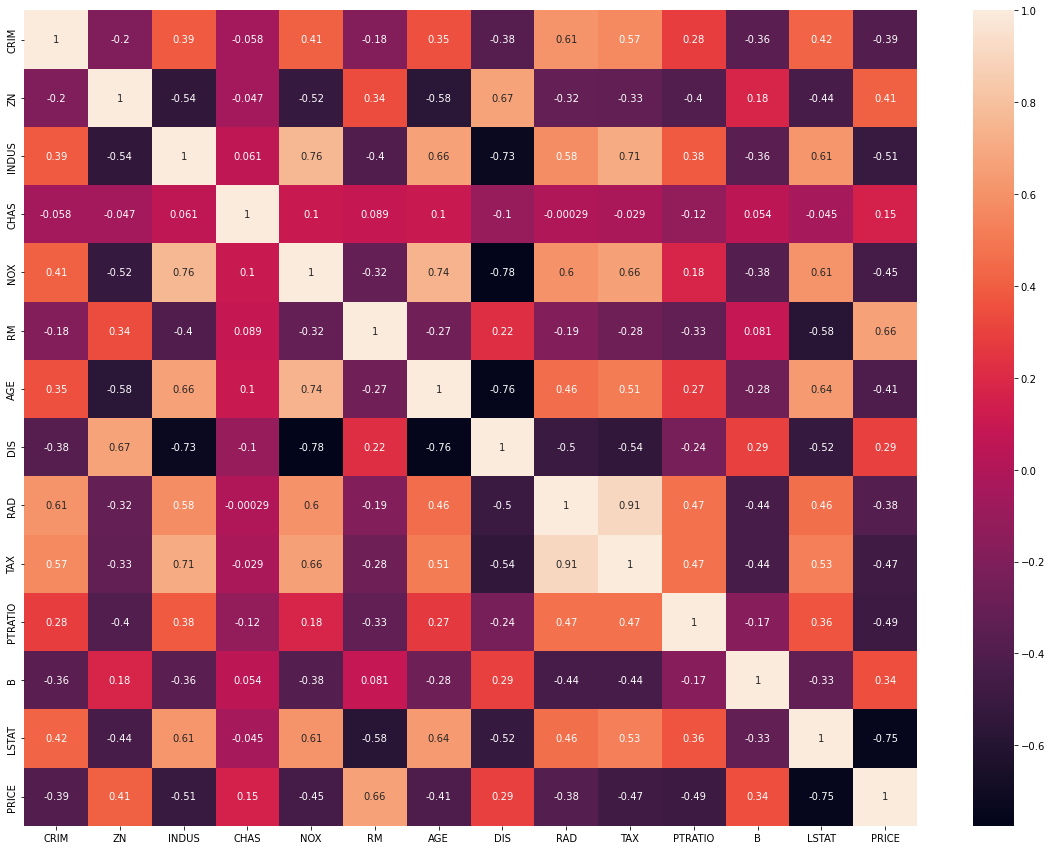

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(), annot=True)

Erkenntnisgewinn: </br>
Da wir den Preis präzise vorhersagen möchten, interessieren uns vor allem die Variablen mit der stärksten negativen oder positiven Korrelation zum Preis. Direkt fällt auf, dass LSTAT eine sehr starke negative Korrelation zu PRICE hat während RM hat eine starke positive Korrelation zu PRICE. Außerdem wird klar, dass viele Variablen eine mittelstarke Korrelation mit der Preisvariable aufweisen. Somit wird interessant zu sehen sein, wie genau das Modell bei der Verwendung aller Variablen werden kann.

### Datenbereinigung und -transformation

In [50]:
print(df_train.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


Keine fehlenden Werte

In [51]:
df_train.drop_duplicates(inplace=True)
df_train.info() # Vergleich mit vorherigem data.info() un zu sehen, ob Values fehlen

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 50 to 265
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  PRICE    404 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 47.3 KB


Keine Duplikate!

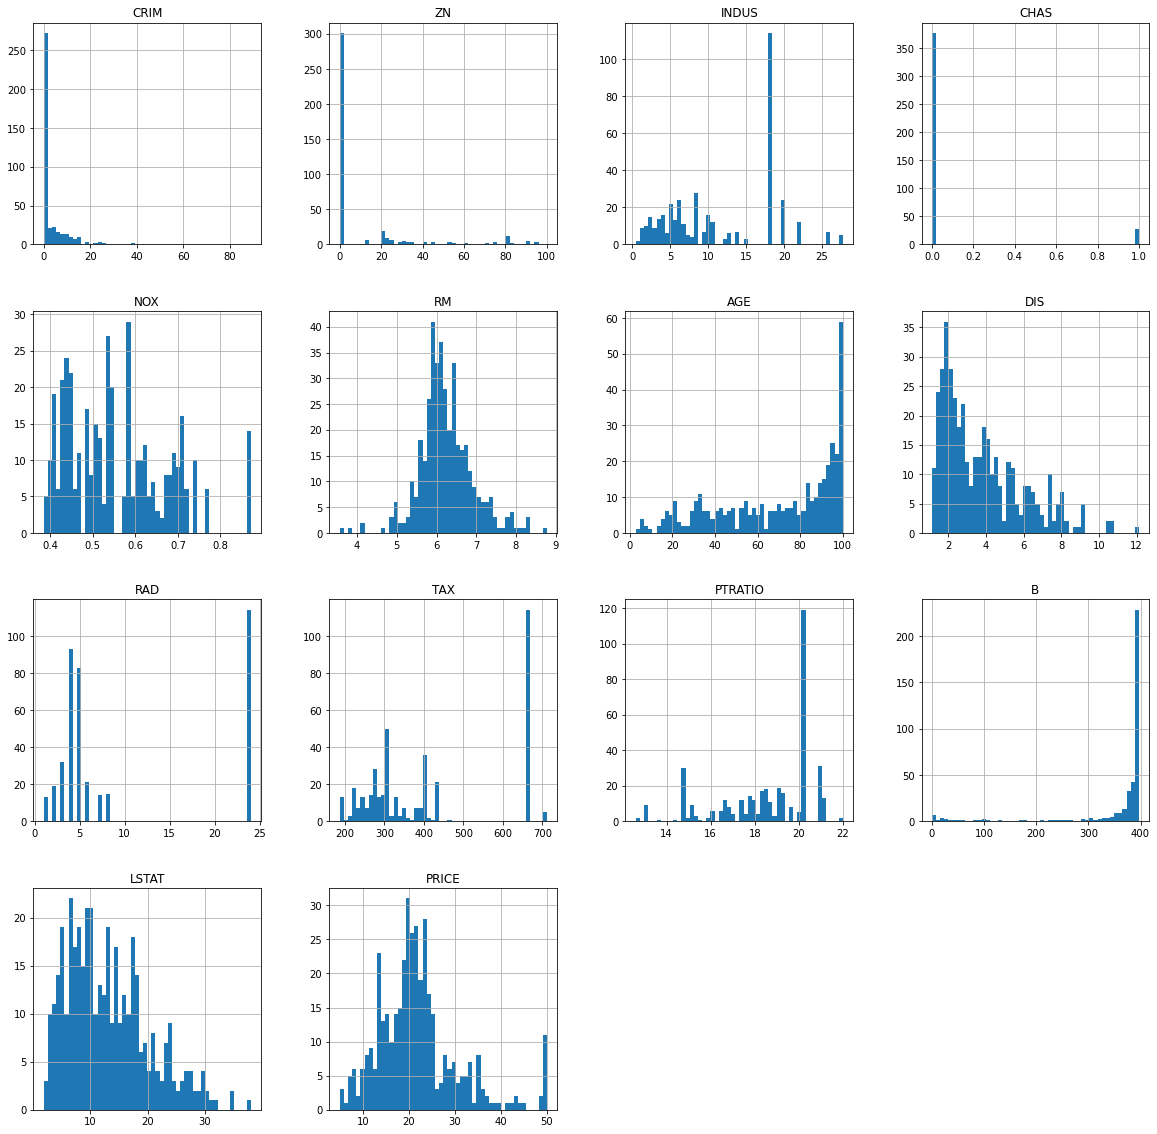

In [52]:
df_train.hist(bins = 50, figsize = (20,20))
plt.show()

Die Histogramme zeigen die Verteilung der Daten auf. Es wird bewusst darauf verzichtet, Ausreißer zu elimieren und Feature Scaling zu betreiben, um zu sehen wie die Modelle ohne diese Schritte klar kommen. (RobustScaler später relevant)

Datensatz verkleinern, um zu überprüfen, ob die zwei relevantesten Variablen bereits ausreichen, um zufriedenstellende Genauigkeit zu erreichen.

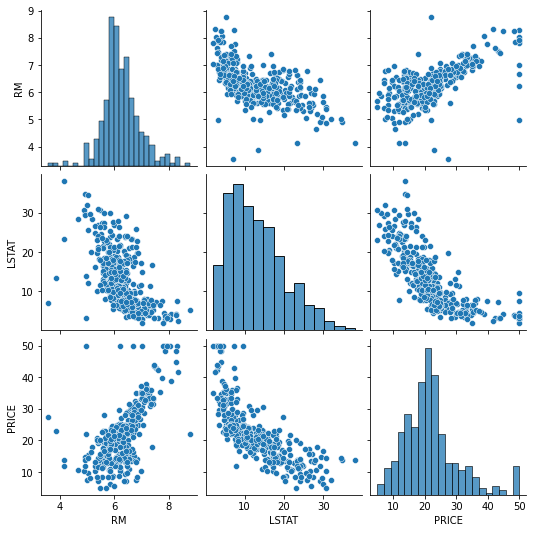

In [53]:
df_train = df_train.drop(df_train.columns[[0, 1, 2, 3, 4, 6,7,8,9,10,11]], axis=1)
sns.pairplot(df_train)

Variablen scheinen nahezu normalverteilt zu sein und wenig Ausreißer zu besitzen. 

Nun wird das Dataset auf die ausgewählten Variablen beschränkt und für die Evaluation gesplittet.

In [54]:
data = data.drop(data.columns[[0, 1, 2, 3, 4, 6,7,8,9,10,11]], axis=1)

In [55]:
X = data.drop(columns='PRICE')
Y = data.PRICE

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

## Modell

### Vorgehensweise: 

Regressionsmodell mit ausgewählten Variablen anhand von Trainingsdaten trainieren sowie Regressionsgeraden einzeichnen</br>
Trainiertes Modell evaluieren anhand Metriken und Residplot</br>
Regressionsmodell mit Testdaten evaluieren (Metriken, Regressionsgeraden und Residplot)</br>
Regressionsmodell mit allen Variablen/Features trainieren und evaluieren (Residplot und Metriken)</br>
Trainiertes Modell mit Testdaten evaluieren (Residplot und Metriken)</br>
Weiteres Regressionsmodell mit anderem Algorithmus erstellen (Training + Test durch Metriken udn Residplot)</br>
Metriken der Modelle vergleichen</br>
Lineares Regressionsmodell mit Scaler verbessern (Evaluation durch Metriken und Residplot)</br>
Interpretation</br>

### Modellauswahl

Da es sich um eine recht einfache Regressionsaufgabe handelt, ist der Einsatz eines linearen Modells zu empfehlen. Für einen adäquaten Vergleich werden beide Modelle auf den LinearRegression Algorithmus beruhen. Durch Ensemble-Methoden können daraufhin die Modelle noch genauer analysieren und durch RobustScaler kann die Genauigkeit (Bestimmtheitsmaß) weiter verbessert werden.

### Modellerstellung

Modelltraining mit Trainingsdaten

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_train)

Modelevaluation

In [58]:
from sklearn import metrics
from math import sqrt
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6251836356449055
Adjusted R^2: 0.6233142273438826
MAE: 3.8883500619498013
MSE: 30.278185000751517
RMSE: 5.5025616762333085


Bestimmtheitsmaß R^2 (genauer adjusted R^2) beschreibt die Anpassungsgüte der Regression und dient für uns hier neben dem RMSE (Wurzel der mittleren Fehlerquadratsumme) als Hauptbewertungskriterium für die Modelle.

In [59]:
px.scatter(x=X_train['RM'], y=y_train, opacity=0.65, 
                trendline='ols', trendline_color_override='red')

Regressionsgerade für RM (durchschnittliche Anzahl der Zimmer pro Wohnung)

In [60]:
px.scatter(x=X_train['LSTAT'], y=y_train, opacity=0.65, 
                trendline='ols', trendline_color_override='red')

Regressionsgerade für LSTAT (% niedrigerer Status der Bevölkerung)

<AxesSubplot:ylabel='PRICE'>

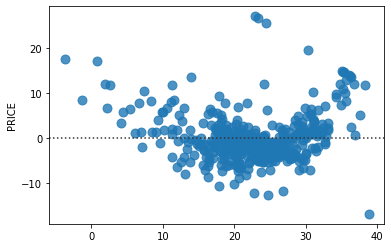

In [61]:
sns.residplot(x=y_pred, y=y_train, scatter_kws={"s": 80})

Residplot zeigt den Fehler zwischen einem vorhergesagten Wert und dem tatsächlichen Wert an. (Je näher an der Gerade auf 0, desto besser)

Modellevaluation mit Testdaten

In [62]:
y_pred = linreg.predict(X_test)

In [63]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.6753556251471677
Adjusted R^2: 0.6737364512077522
MAE: 4.505211813354637
MSE: 32.0837560713939
RMSE: 5.6642524724268695


Erreichte Erfolgsmetrik von mindestens 66% erreicht.

In [64]:
px.scatter(x=X_test['RM'], y=y_test, opacity=0.65, 
                trendline='ols', trendline_color_override='red')

Regressionsgerade für RM (durchschnittliche Anzahl der Zimmer pro Wohnung)

In [65]:
px.scatter(x=X_test['LSTAT'], y=y_test, opacity=0.65, 
                trendline='ols', trendline_color_override='red')

Regressionsgerade für LSTAT (% niedrigerer Status der Bevölkerung)

<AxesSubplot:ylabel='PRICE'>

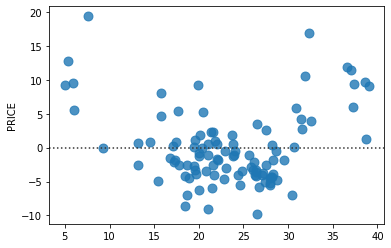

In [66]:
sns.residplot(x=y_pred, y=y_test, scatter_kws={"s": 80})

Weitaus weniger Punkte, da Testset wesentlich kleiner als Trainingset ist.

Modell mit allen Features/Variablen trainieren, um damit die Genauigkeit/das Bestimmtheitsmaß zu erhöhen.

In [67]:
X= df.drop(columns='PRICE')
Y= df.PRICE


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

Modelltraining mit Trainingsdaten

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_train)


In [70]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7293585058196337
Adjusted R^2: 0.7203371226802882
MAE: 3.196196807325742
MSE: 21.86279471487961
RMSE: 4.675766751547773


Weitaus bessere Metriken erreicht. Circa 0.10 höherer Adjusted R^2 Wert.

<AxesSubplot:ylabel='PRICE'>

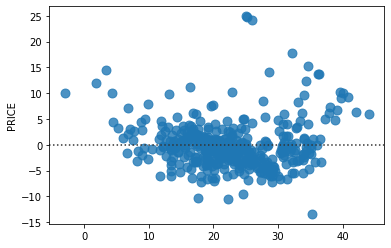

In [71]:
sns.residplot(x=y_pred, y=y_train, scatter_kws={"s": 80})

Im Residplot spiegelt sich die Verbesserung des Modells auch wider.

### Modellevaluation

Modellevaluation mit Testdaten

In [72]:
y_pred = linreg.predict(X_test)


In [73]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7634174432138457
Adjusted R^2: 0.7555313579876406
MAE: 3.7507121808389177
MSE: 23.38083648027037
RMSE: 4.835373458200553


Auch bei der Anwendung auf Testdaten höherer Adjusted R^2 Wert erreicht.

<AxesSubplot:ylabel='PRICE'>

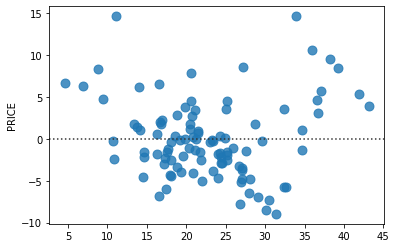

In [74]:
sns.residplot(x=y_pred, y=y_test, scatter_kws={"s": 80})

Residplot spiegelt die Verbesserung des Modells im Vergleich zum Modell mit weniger Variablen wider.

#### Weiteres Regressionsmodell zum Vergleichen

Mit Hilfe von Machine Learning Ansätzen kann das Modell noch weiter verbessert werden. Hierzu wird aus dem Bereich der ensemble Methods (Bagging) der Random Forest Regressor verwendet. Dieses Modell dient dazu, herauszufinden wie genau wir mit den aktuellen Daten werden können.

In [93]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=100)
# n_estimators gibt die Menge an Bäumen an
forest_regressor.fit(X_train, y_train)
y_pred_forest = forest_regressor.predict(X_test)

In [94]:
print('R^2:',metrics.r2_score(y_test, y_pred_forest))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_forest))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_forest))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_forest))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest)))

R^2: 0.9032551217830244
Adjusted R^2: 0.9000302925091251
MAE: 2.0544509803921582
MSE: 9.139169509803933
RMSE: 3.023105937575449


Hier wird ein weitaus höherer Adjusted R^2 Wert und ein weitaus geringerer RMSE Wert erreicht. Dieses Modell ist um einiges besser geeignet.

<AxesSubplot:ylabel='PRICE'>

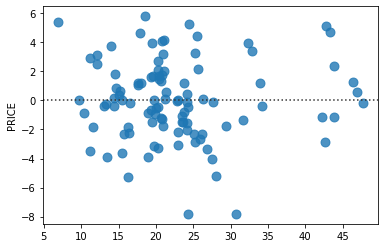

In [77]:
sns.residplot(x=y_pred_forest, y=y_test, scatter_kws={"s": 80})

Sehr geringe Fehler/Abweichung (alle Abweichungen unter 10 und RMSE von 2.8)!

Eine Möglichkeit, das LinearRegression Modell zu verbessern besteht darin, die Daten von einigen Ausreißern zu befreien. Hierzu wird ein RobustScaler angewendet.

In [81]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(x,Y, test_size=0.2)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_train)

In [83]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7305868043727606
Adjusted R^2: 0.7216063645185193
MAE: 3.248182555024504
MSE: 21.906522606791032
RMSE: 4.6804404287193995


In [84]:
y_pred = linreg.predict(X_test)

In [85]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7609468313633009
Adjusted R^2: 0.7529783924087443
MAE: 3.3974798039067506
MSE: 22.582564268949444
RMSE: 4.752111558975593


Durch den Einsatz eines RobustScalers zur Eliminierung von Ausreißern wird das LinearRegression Modell nur marginal besser. Dies liegt vermutlich daran, dass das Dataset keine allzu starken Ausreißer hat.

Weiterhin ist das RandomForestRegressor Modell die mit Abstand beste Wahl für den Use Case und mit hohem Bestimmtheitsmaß (R^2) und geringem Fehler (RMSE).

### Interpretation

Die definierten Erfolgsmetriken wurden bereits mit dem Linear Regression Modell erreicht. Bei der Anwendung auf Testdaten ist die Genauigkeit des Modells mit allen Variablen bereits um einiges höher als das Modell mit nur den relevantesten Variablen. Im Vergleich zur Linearen Regression ist die Preisvorhersage mit dem Random Forest Regressor am effektivsten/genauesten. Mit einem Bestimmtheitsmaß von knapp über 0.90 kann das Modell über 90% der Streuung der Daten "erklären". Dies ist ein sehr gutes Ergebnis, wenn man bedenkt, wie enorm hilfreich ein solches Modell sein kann. Wenn solch ein gutes Ergebnis bereits bei (meist) wenig korrelierenden Daten zu Stande kommt, können durch den Einsatz von noch mehr und präziseren Daten eventuell bald Immobilienmarktexperten obsolet für das Unternehmen werden. Außerdem hat das Dataset ein ethisches Problem durch die Niederstellung von Immobilien an Standorten mit einem hohen Anteil an schwarzer Bevölkerung. Solch eine Auffassung ist nicht mehr zeitgemäß und spielt hoffentlich in der Realität keine Rolle mehr. Stattdessen sollten mehr Faktoren zur Preisermittlung einbezogen werden wie die Grundstücksfläche, Lärmbelästigung oder Nähe zu Schulen und Kindertagesstätten. Solche reellen Faktoren können die Preisvorhersage noch weiter optimieren und damit das Unternehmen bei der Entscheidungsfindung noch besser unterstützen. Ein solch komplexes Thema wie die Ermittlung vom Wert einer Immobilie ist jedoch nicht mit der Analyse von Daten erledigt, sondern bedarf auch weiterhin Strategie und Marktanalysen, welche wiederum neue Daten liefern könnten, die das Modell noch weiter optimieren können.